Source for the tutorial: https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
input_dataset = pd.read_csv('adult-all.csv', header=None, na_values = '?')

In [3]:
input_dataset.shape
input_dataset.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataframe = input_dataset.dropna()

In [5]:
dataframe.shape

(45222, 15)

In [6]:
target = dataframe.values[:,-1]

In [7]:
counter = Counter(target)

In [8]:
for k,v in counter.items():
    per = v/len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=34014, Percentage=75.216%
Class=>50K, Count=11208, Percentage=24.784%


In [9]:
num_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

In [10]:
subset = dataframe[num_columns]

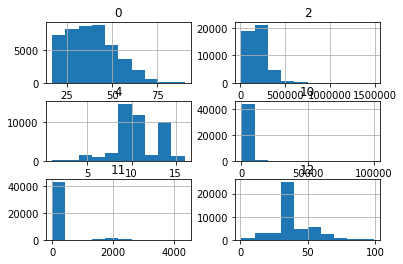

In [11]:
subset.hist()
pyplot.show()

In [12]:
last_ix = len(dataframe.columns) - 1

In [13]:
X,y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]

In [14]:
# cat_ix = X.select_dtypes(include=['object', 'bool']).columns
cat_ix = X.select_dtypes(include=['object', 'bool']).columns

In [15]:
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

In [16]:
y = LabelEncoder().fit_transform(y)

In [17]:
#function to evaluate model
def evaluate_model(X, y, model):
    #defining the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 42)
    #model evaluation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
    return scores

In [18]:
#Define the reference model
model = DummyClassifier(strategy='most_frequent')

In [19]:
scores = evaluate_model(X,y,model)

In [20]:
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.752 (0.000)


In [21]:
def get_models():
    models, names = list(), list()
    #CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    #SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    #Bagging
    models.append(BaggingClassifier(n_estimators=100))
    names.append('BAG')
    #RF
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    #GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    
    return models, names
    

In [27]:
# Setting up a pipeline for data transformation and model running

models, names = get_models()
results = list()
for i in range(len(models)):
    steps = [('c', OneHotEncoder(handle_unknown='ignore'), cat_ix), ('n', MinMaxScaler(), num_ix)]
    ct = ColumnTransformer(steps)
    pipeline = Pipeline(steps=[('t', ct), ('m', models[i])])

    scores = evaluate_model(X,y,pipeline)
    
    results.append(scores)
    
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
    

>CART 0.813 (0.005)


KeyboardInterrupt: 

In [22]:
# Prediction on data
# Taking GradientBoost model as the model for prediction
model = GradientBoostingClassifier(n_estimators=100)
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
pipeline = Pipeline(steps=[('t',ct), ('m',model)])
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('t',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('c',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')),
                         

In [24]:

data = [[24, 'Private', 161198, 'Bachelors', 13, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Male', 0, 0, 25, 'United-States'],
        [23, 'Private', 214542, 'Some-college', 10, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 40, 'United-States'],
        [38, 'Private', 309122, '10th', 6, 'Divorced', 'Machine-op-inspct', 'Not-in-family', 'White', 'Female', 0, 0, 40, 'United-States']]
for row in data:

    yhat = pipeline.predict([row])
    
    label = yhat[0]
    
    print('>Predicted=%d (expected 0)' % (label))

data = [[55, 'Local-gov', 107308, 'Masters', 14, 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States'],
        [53, 'Self-emp-not-inc', 145419, '1st-4th', 2, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 7688, 0, 67, 'Italy'],
        [44, 'Local-gov', 193425, 'Masters', 14, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'White', 'Female', 4386, 0, 40, 'United-States']]
for row in data:

    yhat = pipeline.predict([row])
    label = yhat[0]
    
    print('>Predicted=%d (expected 1)' % (label))

>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
